In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the price data
dt = pd.read_csv('price_dat.csv')
dt = dt[dt['ABB.BO'].notna()]
dt = dt.reset_index()
# data_frame = data_frame.sort_index(axis=1 ,ascending=True)
dt = dt.set_index('Date')
# print(dt.index.to_list())
dt = dt.drop(['index'], axis=1)
data = dt.sort_index(ascending=False)
dt = dt + 1
rows = dt.shape[1]
dt

,ABB.BO,AEGISLOG.BO,AMARAJABAT.BO,AMBALALSA.BO,HDFC.BO,ANDHRAPET.BO,ANSALAPI.BO,ARUNAHTEL.BO,BOMDYEING.BO,ASIANHOTNR.BO,...,EUROMULTI.NS,JAINSTUDIO.NS,DCMFINSERV.NS,JAIHINDPRO.NS,BLUECHIP.NS,SABEVENTS.NS,ATNINTER.NS,ORCHIDPHAR.NS,SHARONBIO.NS,TANTIACONS.NS
Date,,,,,,,,,,,,,,,,,,,,,
31-10-2017,0.990545,0.989377,0.984577,1.442211,0.980864,1.157967,1.070588,1.000000,1.098671,1.066520,...,0.928571,1.053191,1.000000,1.000000,1.000000,0.600451,1.000000,0.989160,0.888889,1.119355
30-11-2017,1.008461,0.997853,1.145918,0.953833,0.982738,1.225386,1.000000,1.000000,1.139218,1.114829,...,0.923077,0.959596,1.000000,1.155963,1.000000,1.033835,1.000000,0.958903,0.894737,1.074928
31-12-2017,1.003550,1.232408,1.051937,0.946119,1.019402,1.239109,1.167033,1.000000,1.253671,1.311226,...,1.361111,1.052632,1.000000,0.952381,1.000000,0.963636,1.000000,1.068572,1.080882,1.008043
31-1-2018,1.184209,0.871835,0.960978,1.212355,1.143424,1.100781,1.000000,1.000000,0.821081,1.492512,...,0.979592,0.970000,1.000000,0.883333,1.000000,1.071698,1.000000,0.941176,0.911565,0.904255
28-2-2018,0.925934,1.012519,1.018261,0.960191,0.927929,0.836054,0.864407,1.000000,1.134957,1.058690,...,1.020833,0.917526,1.000000,1.009434,1.000000,0.757042,1.000000,0.940340,0.955224,0.914706
31-3-2018,0.838422,1.025961,0.969605,0.882255,1.007256,0.974533,0.847495,0.040000,0.925561,1.080114,...,1.020408,0.898876,0.573333,0.990654,0.250000,0.846512,1.000000,0.664653,0.859375,0.752412
30-4-2018,1.056612,1.112807,1.080564,1.265977,1.033025,1.174216,1.138817,1.599848,1.296637,1.075662,...,1.080000,0.812500,1.000000,0.924528,5.000000,0.912088,1.000000,0.818184,0.972727,1.042735
31-5-2018,0.908967,0.948273,0.923180,1.003712,0.970207,0.725519,0.765237,1.303001,0.776543,0.831153,...,0.925926,0.969231,1.302326,0.959184,1.000000,0.891566,1.000000,0.844445,0.887850,0.631148
30-6-2018,0.961675,0.778510,0.911948,0.973373,1.043123,0.984663,1.035398,0.531993,0.914315,0.903519,...,0.960000,1.158730,0.803571,1.000000,1.000000,0.986486,1.000000,1.171052,0.726316,1.123377


In [3]:
# Helper Fuctions
def compute_returns(prices, Date, tenure):
    returns = 1
    for i in range(1,tenure + 1): # 6 Stands for 6 month return
        returns = returns*prices.shift(i)
    return returns - 1

def del_rows(ret, interv=3):
    ret = ret.reset_index().T
    l = [ls%interv==0 for ls in list(ret.columns)]
    return ret.loc[: ,l].T.set_index('Date')

In [4]:
ret = compute_returns(dt,1,6)
ret = ret[ret['ABB.BO'].notna()]
ret = ret.shift(1)
ret = ret[ret['ABB.BO'].notna()]
ret

,ABB.BO,AEGISLOG.BO,AMARAJABAT.BO,AMBALALSA.BO,HDFC.BO,ANDHRAPET.BO,ANSALAPI.BO,ARUNAHTEL.BO,BOMDYEING.BO,ASIANHOTNR.BO,...,EUROMULTI.NS,JAINSTUDIO.NS,DCMFINSERV.NS,JAIHINDPRO.NS,BLUECHIP.NS,SABEVENTS.NS,ATNINTER.NS,ORCHIDPHAR.NS,SHARONBIO.NS,TANTIACONS.NS
Date,,,,,,,,,,,,,,,,,,,,,
31-5-2018,-0.078400,0.101923,0.126057,0.336683,0.050156,0.576923,-8.470585e-02,-0.960000,0.353407,1.660793,...,1.904762e-01,-0.148936,-0.426667,-2.752287e-02,-7.500000e-01,-0.589165,0.000000e+00,-0.403795,-0.356725,-0.245161
30-6-2018,-0.016931,0.239393,0.235836,0.173345,0.106001,0.599051,-2.637364e-02,-0.936006,0.597272,1.683602,...,3.846154e-01,-0.343434,-0.426667,-1.009174e-01,2.500000e-01,-0.375940,0.000000e+00,-0.506849,-0.296053,-0.296830
31-7-2018,-0.113920,0.177812,-0.004380,0.234703,0.091898,-0.053243,-2.549450e-01,-0.916616,0.088773,1.000741,...,3.888889e-01,-0.336842,-0.253333,-2.539683e-01,2.500000e-01,-0.461818,0.000000e+00,-0.565713,-0.301471,-0.587131
31-8-2018,-0.150894,-0.255978,-0.136875,0.270270,0.117306,-0.247656,-3.389831e-01,-0.955640,-0.205946,0.378638,...,-2.040814e-02,-0.270000,-0.400000,-2.166667e-01,2.500000e-01,-0.449057,0.000000e+00,-0.524063,-0.530612,-0.539894
30-9-2018,-0.257953,-0.044267,0.019189,-0.003185,0.030400,-0.119943,-3.747646e-01,-0.958963,0.149108,-0.140856,...,4.166663e-02,-0.329897,-0.373333,-1.509434e-01,2.500000e-01,-0.739437,0.000000e+00,-0.528409,-0.537313,-0.547059
31-10-2018,-0.139203,-0.126659,0.033148,0.242123,0.075220,0.339559,-3.180828e-01,-0.932165,0.050543,-0.175608,...,-2.040814e-02,-0.325843,-0.480000,-1.682243e-01,-2.220446e-16,-0.674419,0.000000e+00,-0.546826,-0.210937,-0.630225
30-11-2018,0.097254,-0.237312,-0.068019,0.118421,-0.029795,0.209059,-4.215939e-01,0.585366,-0.294382,-0.367715,...,-8.000002e-02,0.325000,-0.046512,-1.981132e-01,1.000000e+00,-0.653846,0.000000e+00,-0.399999,-0.163636,-0.521368
31-12-2018,-0.052236,-0.244104,-0.131672,-0.189310,-0.053294,0.269288,-5.033860e-01,-0.140067,-0.661540,-0.547791,...,-1.481482e-01,1.523077,-0.162791,-1.530612e-01,1.600000e+00,-0.614458,7.499999e-01,-0.449999,-0.093458,-0.573771
31-1-2019,0.145155,-0.225458,-0.101319,-0.042160,0.093866,0.145194,-3.828909e-01,-0.581353,-0.586031,-0.455556,...,-3.200000e-01,1.063492,-0.428571,-2.340425e-01,2.200000e+00,-0.486486,5.000000e-01,-0.276318,0.200000,-0.363636


In [5]:
rank = ret.rank(axis=1)
for col in rank.columns:
    rank[col] = np.where(rank[col] >= rows-4, 1, np.where(rank[col] <= 5, -1, 0))
rank = del_rows(rank)
rank.head()
rank

,ABB.BO,AEGISLOG.BO,AMARAJABAT.BO,AMBALALSA.BO,HDFC.BO,ANDHRAPET.BO,ANSALAPI.BO,ARUNAHTEL.BO,BOMDYEING.BO,ASIANHOTNR.BO,...,EUROMULTI.NS,JAINSTUDIO.NS,DCMFINSERV.NS,JAIHINDPRO.NS,BLUECHIP.NS,SABEVENTS.NS,ATNINTER.NS,ORCHIDPHAR.NS,SHARONBIO.NS,TANTIACONS.NS
Date,,,,,,,,,,,,,,,,,,,,,
31-5-2018,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
31-8-2018,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
30-11-2018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28-2-2019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31-5-2019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31-8-2019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30-11-2019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
29-2-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31-5-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
look = compute_returns(dt,1,3)
look = ret[ret['ABB.BO'].notna()]
look = del_rows(look)
# look.loc[rank.index.to_list(),:]
look.head()

,ABB.BO,AEGISLOG.BO,AMARAJABAT.BO,AMBALALSA.BO,HDFC.BO,ANDHRAPET.BO,ANSALAPI.BO,ARUNAHTEL.BO,BOMDYEING.BO,ASIANHOTNR.BO,...,EUROMULTI.NS,JAINSTUDIO.NS,DCMFINSERV.NS,JAIHINDPRO.NS,BLUECHIP.NS,SABEVENTS.NS,ATNINTER.NS,ORCHIDPHAR.NS,SHARONBIO.NS,TANTIACONS.NS
Date,,,,,,,,,,,,,,,,,,,,,
31-5-2018,-0.0783999,0.101923,0.126057,0.336683,0.0501557,0.576923,-0.0847058,-0.96,0.353407,1.66079,...,0.190476,-0.148936,-0.426667,-0.0275229,-0.75,-0.589165,0,-0.403795,-0.356725,-0.245161
31-8-2018,-0.150894,-0.255978,-0.136875,0.27027,0.117306,-0.247656,-0.338983,-0.95564,-0.205946,0.378638,...,-0.0204081,-0.27,-0.4,-0.216667,0.25,-0.449057,0,-0.524063,-0.530612,-0.539894
30-11-2018,0.097254,-0.237312,-0.0680189,0.118421,-0.0297946,0.209059,-0.421594,0.585366,-0.294382,-0.367715,...,-0.08,0.325,-0.0465117,-0.198113,1,-0.653846,0,-0.399999,-0.163636,-0.521368
28-2-2019,0.12824,-0.036703,0.0319978,0.00607902,0.0414029,0.192108,-0.332194,-0.308591,-0.481123,-0.38512,...,-0.479167,0.616438,-0.377778,-0.414894,2,-0.541096,-1.11022e-16,-0.460673,0.463768,-0.450867
31-5-2019,-0.0624222,0.0200604,-0.0271709,0.190756,0.111101,-0.210375,2.22045e-16,-0.620192,-0.178168,-0.25635,...,-0.695652,-0.462264,-0.439024,-0.647059,5,-0.47619,-0.75,-0.151517,-0.23913,-0.473214


In [10]:
returns_signals = np.multiply(look, rank)
# returns_signals = np.multiply(returns_data, rank)
portf_returns = pd.DataFrame(index = rank.index, columns = ['ls'])
portf_returns = returns_signals.sum(axis = 1)/10
portf_returns.to_csv('result.csv')
portf_returns

Date
31-5-2018     2.704666
31-8-2018     3.228228
30-11-2018    6.153781
28-2-2019     5.640530
31-5-2019     4.685875
31-8-2019     3.357654
30-11-2019    3.375267
29-2-2020     3.332223
31-5-2020     2.845998
31-8-2020     7.714800
dtype: float64

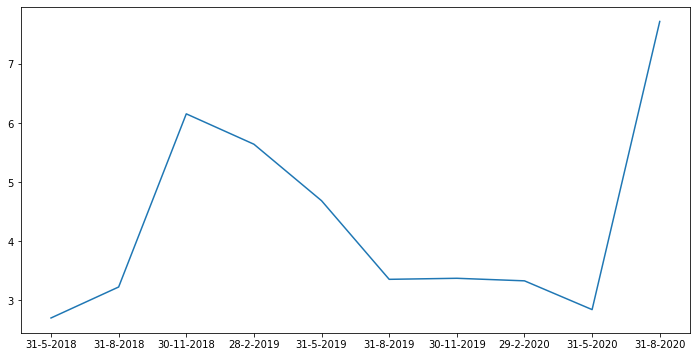

In [15]:
plt.figure(figsize=(12,6))
plt.plot(portf_returns)
plt.savefig('Results/result.jpg')
plt.show()